# Explonatory Data Analisys
EDA is about understanding and examining data before teaching any model. Understand the structure, distribution, and patterns of the data, and assess the need for cleaning/feature engineering.

## Why is it important?
- It helps to understand the structure of the data.
- It helps to recognize patterns and anomalies.
- It helps to determine which models may be suitable.

## What should it contain?
- Descriptive statistics (mean, standard deviation, percentiles)
- Distribution analysis (histogram, boxplot)
- Frequency of categories (e.g., room_type ratios)
- Searching for relationships (scatter plot, heatmap correlation)
- Distribution of the target variable (price) and its relationship to other features
- Visualizations (matplotlib, seaborn, plotly)

### Setting Up Libraries and Environment for EDA

In [15]:
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns
from dotenv import load_dotenv

pd.set_option('display.max_rows', None) 

project_root = "/Users/erikvida/PycharmProjects/airbnb-price-prediction"
if project_root not in sys.path:
    sys.path.append(project_root)

from src.db_connection import DatabaseConfig, DatabaseConnection


dotenv_path = "/Users/erikvida/PycharmProjects/airbnb-price-prediction/.env"
load_dotenv(dotenv_path)

True

### 1.0 Loading Data and Initial Overview for Processing

In [16]:
df_all_data = pd.read_csv("../data/processed/amsterdam_airbnbs_feature_engineered_data.csv")
df_all_data.head()

,id,name,description,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,neighbourhood,...,neighbourhood_rank,property_type_id,room_type_id,bedroom_bath_ratio,people_per_bed,rooms_total,description_sentiment,amenities_sentiment,description_sentiment_label,amenities_sentiment_label
0,27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,1.0,0.98,1,1.0,1.0,1,"Amsterdam, North Holland, Netherlands",...,1,34,3,0.666667,2.0,2.5,0.9286,0.7579,positive,positive
1,28871,Comfortable double room,Basic bedroom in the center of Amsterdam.,1.0,0.99,1,2.0,2.0,1,"Amsterdam, North Holland, Netherlands",...,1,38,3,1.000000,2.0,2.0,0.0000,-0.2023,neutral,negative
2,29051,Comfortable single / double room,This room can also be rented as a single or a ...,1.0,0.99,1,2.0,2.0,1,"Amsterdam, North Holland, Netherlands",...,2,26,3,1.000000,2.0,2.0,0.0000,-0.2023,neutral,negative
3,47061,Charming apartment in old centre,"A beautiful, quiet apartment in the center of ...",1.0,0.50,0,1.0,2.0,1,"Amsterdam, Noord-Holland, Netherlands",...,3,12,1,1.333333,1.5,3.5,0.5994,-0.2023,positive,negative
4,49552,Multatuli Luxury Guest Suite in top location,Stylish & spacious 60m2 guest suite in Amsterd...,1.0,0.92,1,1.0,2.0,1,"Amsterdam, North Holland, Netherlands",...,1,7,1,2.000000,1.5,3.0,0.9168,0.2960,positive,positive


### 1.1 Inspecting and Understanding the Loaded Data

In [17]:
df_all_data.describe(include='all').T

/Users/erikvida/PycharmProjects/airbnb-price-prediction/.ve/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/erikvida/PycharmProjects/airbnb-price-prediction/.ve/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,6080.0,NaN,NaN,NaN,617400699877789312.0,549962822244849152.0,27886.0,29865731.75,748733352858412544.0,1137036790717612928.0,1438602403155395328.0
name,6080,5950,Appartement in Amsterdam,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,6080,5849,Hotel Jansen Bajeskwartier has 200 fully furni...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,6080.0,NaN,NaN,NaN,0.937586,0.184126,0.0,1.0,1.0,1.0,1.0
host_acceptance_rate,6080.0,NaN,NaN,NaN,0.727641,0.319349,0.0,0.5,0.87,1.0,1.0
host_is_superhost,6080.0,NaN,NaN,NaN,0.225822,0.418157,0.0,0.0,0.0,0.0,1.0
host_listings_count,6080.0,NaN,NaN,NaN,4.569737,38.8945,1.0,1.0,1.0,2.0,911.0
host_total_listings_count,6080.0,NaN,NaN,NaN,7.138322,70.464376,1.0,1.0,1.0,3.0,1621.0
host_has_profile_pic,6080.0,NaN,NaN,NaN,0.984211,0.12467,0.0,1.0,1.0,1.0,1.0
neighbourhood,6080,32,"Amsterdam, Noord-Holland, Netherlands",5575,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.0 Examination of distributions (histograms, box plots)

<Axes: xlabel='price', ylabel='Count'>

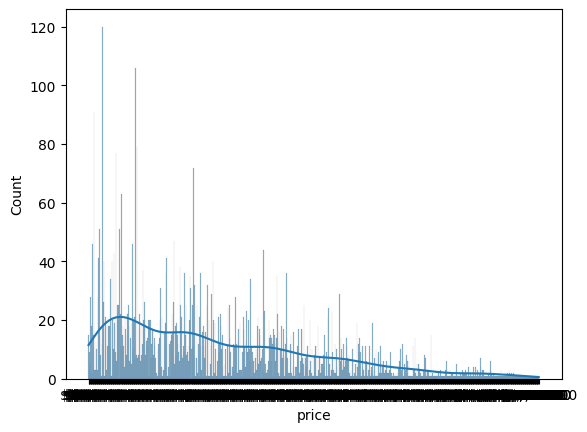

In [19]:
sns.histplot(df_all_data['price'], bins=50, kde=True)
sns.show() 